In [1]:
# %run train.py
# %matplotlib inline

In [2]:
# from train import main 

In [3]:
# main()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import os

from model import EfficientHiragana

2022-11-19 11:30:51.079545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-19 11:30:52.975824: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2022-11-19 11:30:52.975880: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2022-11-19 11:30:52.978500: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2022-11-19 11:30:53.305648: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


Found 54930 files belonging to 46 classes.


2022-11-19 11:32:15.434918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-19 11:32:15.436483: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (NVIDIA GeForce RTX 3060)
2022-11-19 11:32:15.600575: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-19 11:32:15.600615: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2022-11-19 11:32:15.600637: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

Number of layers in the base model:  5
Epoch 1/5


2022-11-19 11:32:22.398252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-19 11:32:24.201601: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-19 11:32:24.201682: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 25346 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2022-11-19 11:32:24.205760: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-19 11:32:24.205864: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

98/98 [==============================] - ETA: 0s - loss: 0.2640 - accuracy: 0.9349

2022-11-19 11:34:18.528375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-19 11:34:18.943107: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-19 11:34:18.943186: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 25346 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2022-11-19 11:34:18.945920: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-19 11:34:18.946015: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

98/98 [==============================] - 133s 979ms/step - loss: 0.2640 - accuracy: 0.9349 - val_loss: 0.1685 - val_accuracy: 0.9521
Epoch 2/5
98/98 [==============================] - 89s 781ms/step - loss: 0.0111 - accuracy: 0.9966 - val_loss: 0.0107 - val_accuracy: 0.9961
Epoch 3/5
98/98 [==============================] - 88s 770ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.0049 - val_accuracy: 0.9984
Epoch 4/5
98/98 [==============================] - 88s 770ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0106 - val_accuracy: 0.9961
Epoch 5/5
98/98 [==============================] - 90s 782ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0053 - val_accuracy: 0.9986
Model: "efficient_hiragana"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  39        
                                                                 
 effici

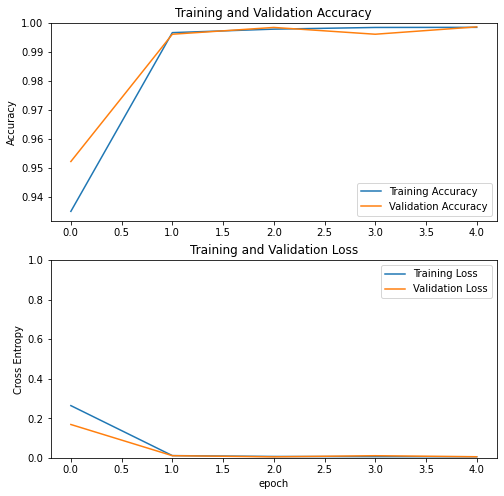

10/10 [==============================] - 12s 656ms/step - loss: 0.0055 - accuracy: 0.9984
Test accuracy : 0.9984375238418579


In [2]:
# hyper parameters
BATCH_SIZE=512
IMG_SIZE=48

# load images
PATH = '/mnt/c/Users/44yos/Hiragana/hiragana_classifier' # os.path.dirname(os.path.realpath(__file__))
data_dir = os.path.join(PATH, 'datasets')
datasets = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
)

# train / test split
all_batches = tf.data.experimental.cardinality(datasets)
test_dataset = datasets.take(all_batches // 10)
train_dataset = datasets.skip(all_batches // 10)

# prefetch
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# create model
input_shape = IMG_SIZE #tf.keras.Input(shape=(48, 48, 1))
output_shape = 46
model = EfficientHiragana(input_shape, output_shape)
optimizer = tf.keras.optimizers.Adam()
# loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# freeze the 100 layers to fine-tuning
model.trainable = True
print("Number of layers in the base model: ", len(model.layers))
# fine_tune_at = 100
# for layer in model.layers[:fine_tune_at]:
#   layer.trainable = False

# train model 
epochs=5

history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    epochs=epochs,
    validation_data=test_dataset,
)

model.save_weights('EfficientNetB0_Hiragana.h5')

# model.build(input_shape=(None, IMG_SIZE, IMG_SIZE, 3))
print(model.summary())

# visualize the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8),facecolor='w')
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

plt.savefig('results.png')
plt.show()

# # plot 
# fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
# # for loss
# axL.plot(history.history['loss'],label="loss for training")
# axL.plot(history.history['val_loss'],label="loss for validation")
# axL.set_title('model loss')
# axL.set_xlabel('epoch')
# axL.set_ylabel('loss')
# axL.legend(loc='upper right')
# axR.plot(history.history['accuracy'],label="acc for training")
# axR.plot(history.history['val_accuracy'],label="acc for validation")
# axR.set_title('model accuracy')
# axR.set_xlabel('epoch')
# axR.set_ylabel('accuracy')
# axR.legend(loc='upper right')
# plt.show()
# plt.savefig('results.png')

# evaluate the model using test_dataset
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

In [3]:
# print(model.layers[1].summary())

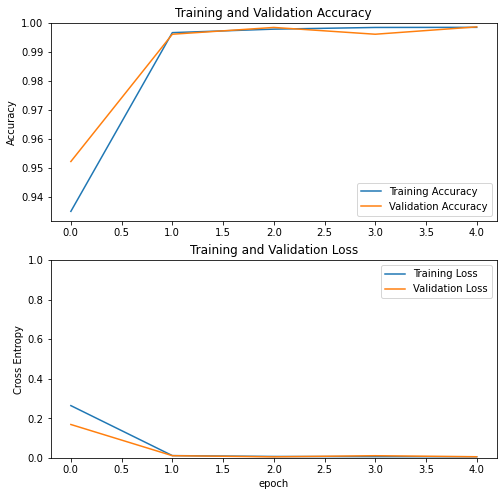

In [12]:
# # visualize the results
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# plt.figure(figsize=(8, 8),facecolor='w')
# plt.subplot(2, 1, 1)
# plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
# plt.title('Training and Validation Accuracy')

# plt.subplot(2, 1, 2)
# plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
# plt.title('Training and Validation Loss')
# plt.xlabel('epoch')

# plt.savefig('results.png')
# plt.show()